In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = pd.read_csv('iris.csv',index_col=0)

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [5]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [6]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [7]:
iris.iloc[:,0:4]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [8]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [9]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [10]:
y

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [11]:
iris['Species'].unique()

array([0, 1, 2])

In [12]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [14]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [16]:
x_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
63,6.0,2.2,4.0,1.0
24,5.1,3.3,1.7,0.5
27,5.0,3.4,1.6,0.4
49,5.3,3.7,1.5,0.2
3,4.7,3.2,1.3,0.2
...,...,...,...,...
72,6.1,2.8,4.0,1.3
13,4.8,3.0,1.4,0.1
51,7.0,3.2,4.7,1.4
8,5.0,3.4,1.5,0.2


In [17]:
y_train

63    1
24    0
27    0
49    0
3     0
     ..
72    1
13    0
51    1
8     0
71    1
Name: Species, Length: 120, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

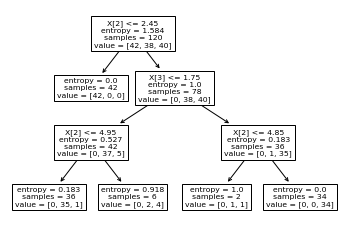

In [19]:
#PLot the decision tree
tree.plot_tree(model);


In [20]:
y_train.value_counts()

0    42
2    40
1    38
Name: Species, dtype: int64

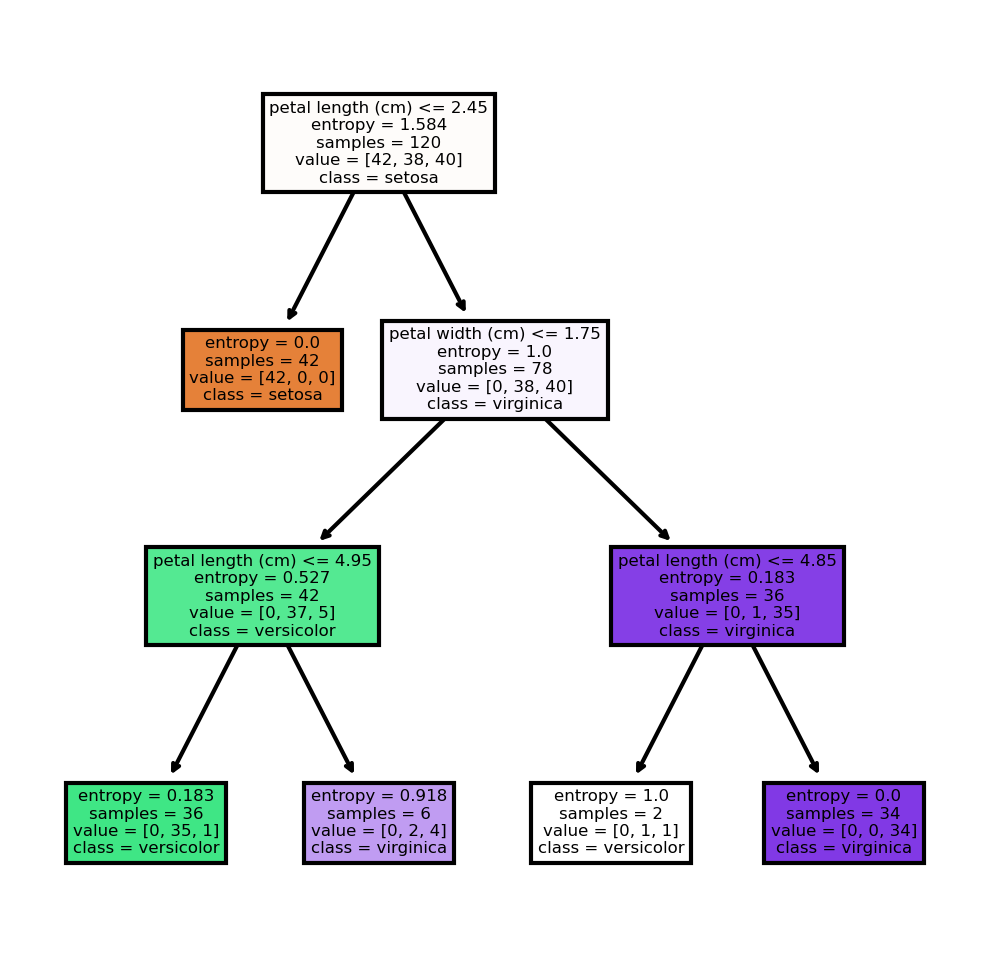

In [21]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [22]:
pred_train = model.predict(x_train)

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [24]:
y_test

39     0
67     1
116    2
118    2
90     1
137    2
69     1
95     1
85     1
29     0
91     1
12     0
41     0
127    2
80     1
145    2
124    2
125    2
77     1
60     1
133    2
106    2
54     1
18     0
65     1
19     0
14     0
117    2
10     0
82     1
Name: Species, dtype: int64

In [25]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [26]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [27]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

In [28]:
y_test[127:]

Series([], Name: Species, dtype: int64)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

#### Decision Tree Regression Example

In [32]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [33]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
#Find the accuracy
model.score(X_test,y_test)

0.8593018369552168

## Pollution Data

In [37]:
df = pd.read_csv('pollution.csv')
df

,Pollution,Temp,Industry,Population,Wind,Rain,WetDays
0,24,61.5,368,497,9.1,48.34,115
1,30,55.6,291,593,8.3,43.11,123
2,56,55.9,775,622,9.5,35.89,105
3,28,51.0,137,176,8.7,15.17,89
4,14,68.4,136,529,8.8,54.47,116
5,46,47.6,44,116,8.8,33.36,135
6,9,66.2,641,844,10.9,35.94,78
7,35,49.9,1064,1513,10.1,30.96,129
8,26,57.8,197,299,7.6,42.59,115
9,61,50.4,347,520,9.4,36.22,147


In [38]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [40]:
model = DecisionTreeRegressor(max_depth = 4, max_leaf_nodes=10)

In [41]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [42]:
cross_val_score(model, X, Y, cv=10)

array([-1.46075938, -0.91057372, -0.65636783,  0.13591145, -1.68767598,
       -0.61571157,  0.75132053,  0.44755215, -5.08188162,  0.50853646])

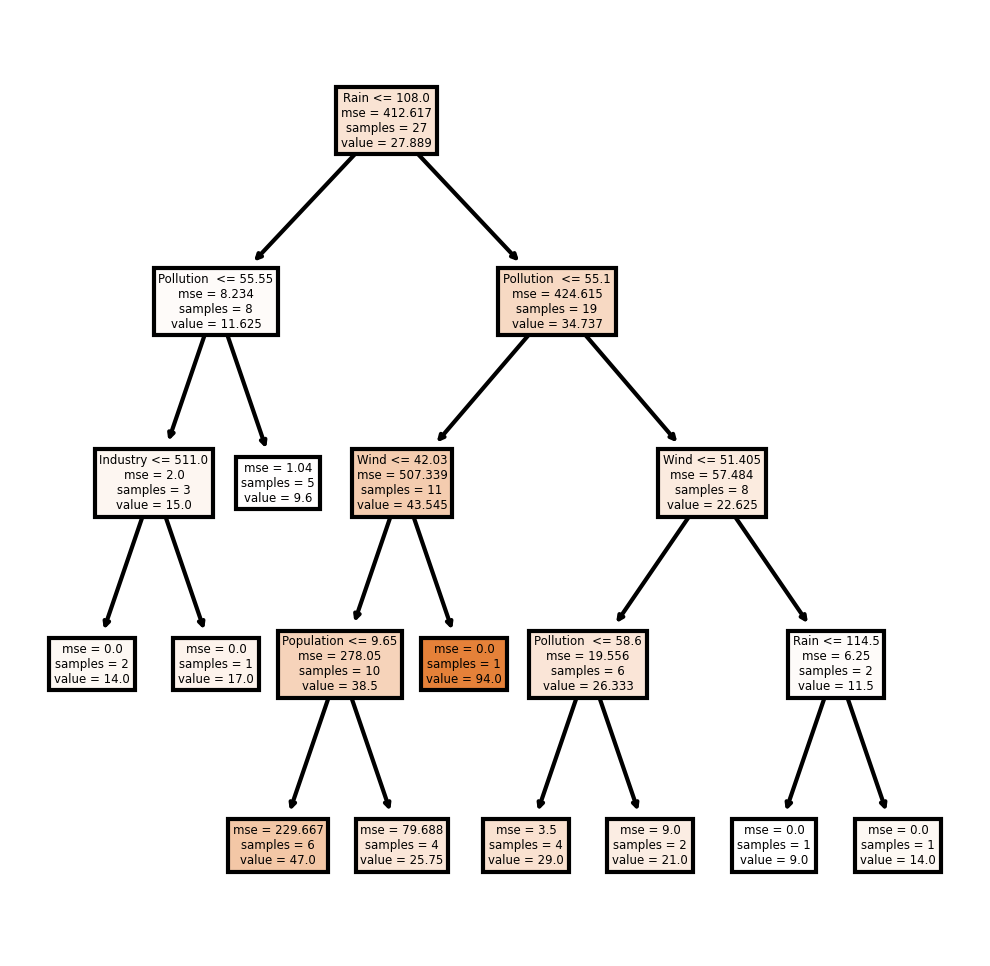

In [43]:
fn=df.columns
#cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               #class_names=cn,
               filled = True);